#### REGRESSION TASK ####


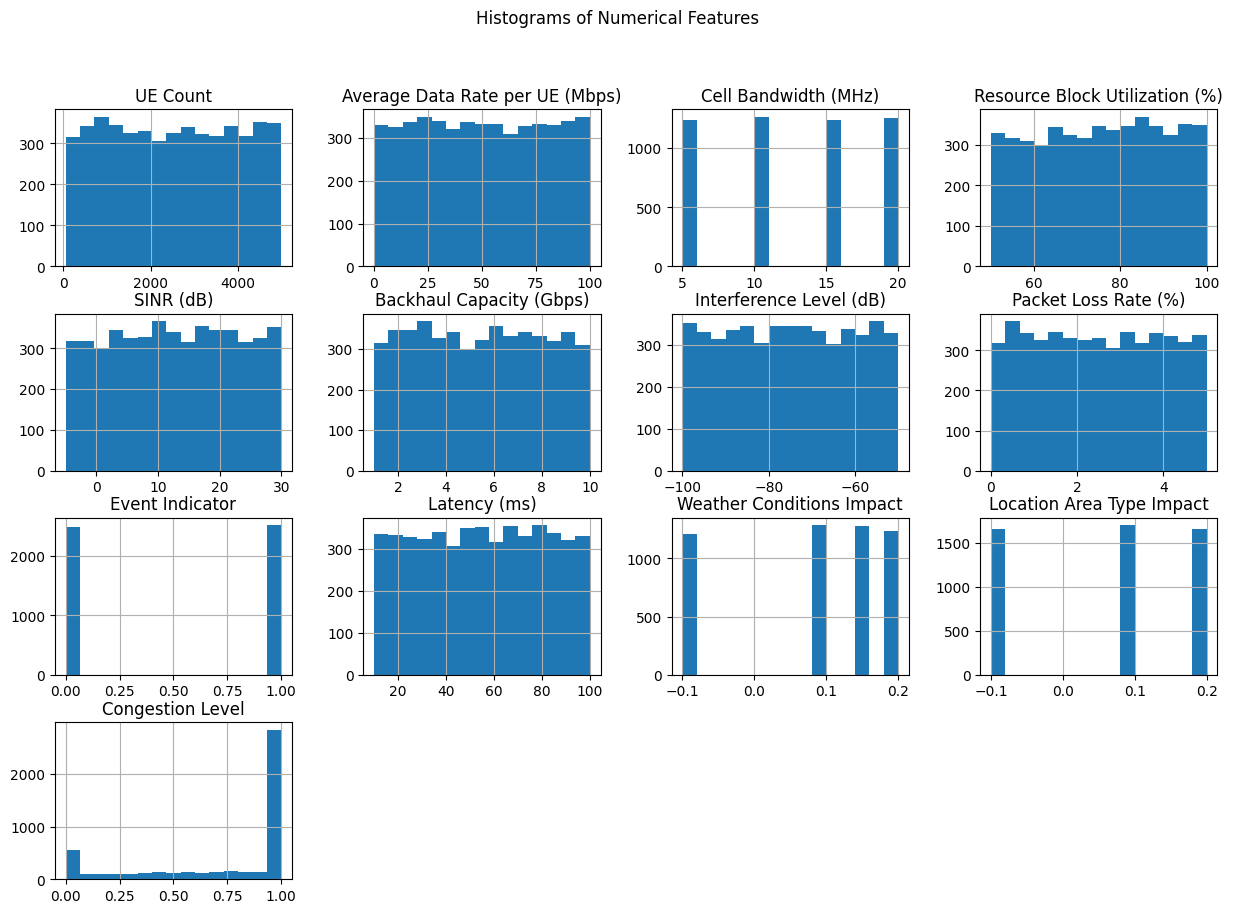

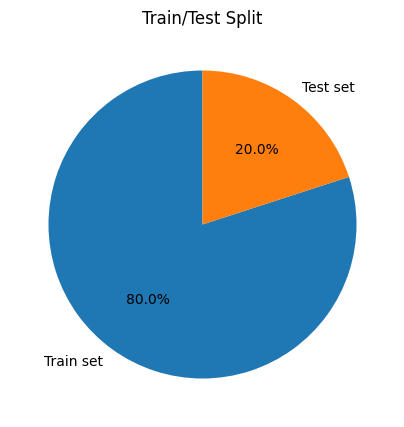

Linear Regression:
  Mean Absolute Error (MAE): 0.1607
  Mean Squared Error (MSE): 0.0367
  R-squared (R²): 0.7071



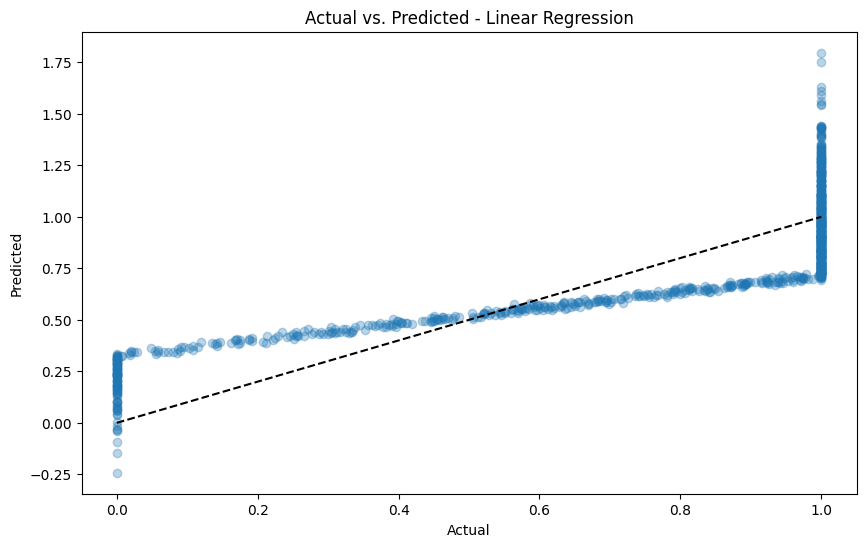

Random Forest:
  Mean Absolute Error (MAE): 0.1194
  Mean Squared Error (MSE): 0.0266
  R-squared (R²): 0.7877



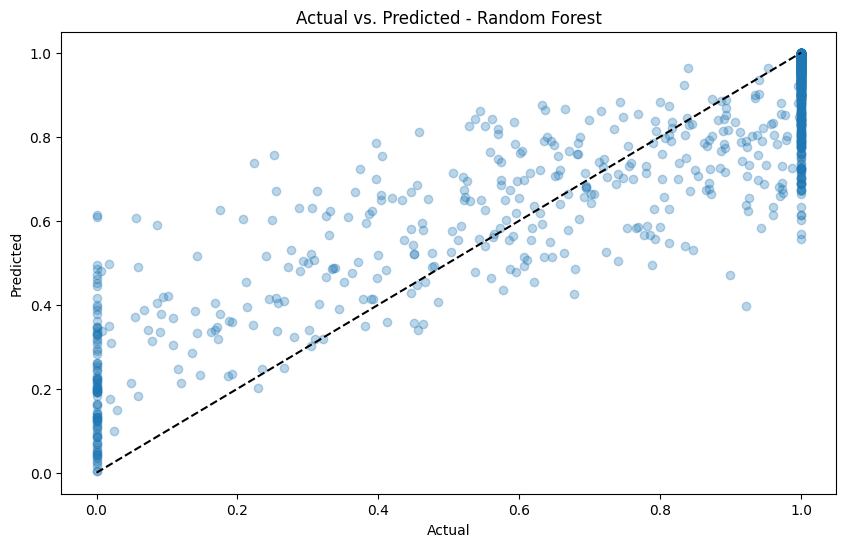

Linear Regression with Selected Features:
  Mean Absolute Error (MAE): 0.1659
  Mean Squared Error (MSE): 0.0391
  R-squared (R²): 0.6882



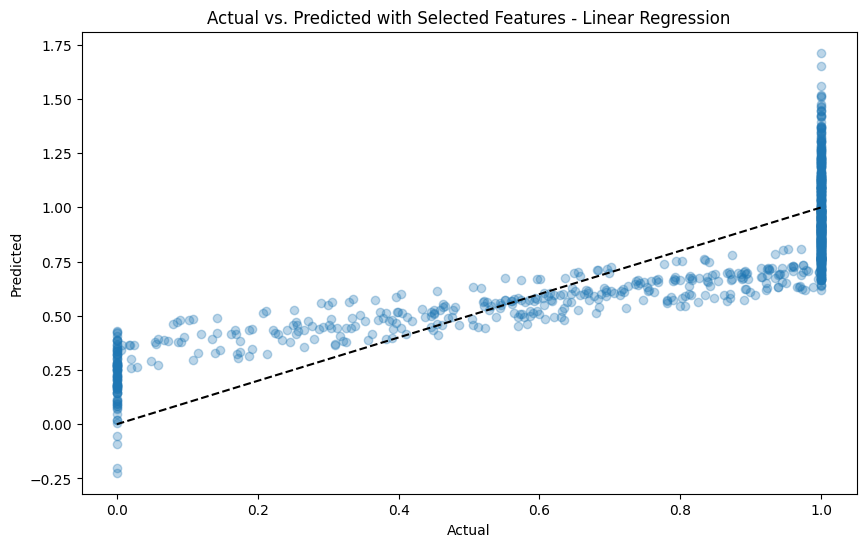

Random Forest with Selected Features:
  Mean Absolute Error (MAE): 0.1117
  Mean Squared Error (MSE): 0.0247
  R-squared (R²): 0.8029



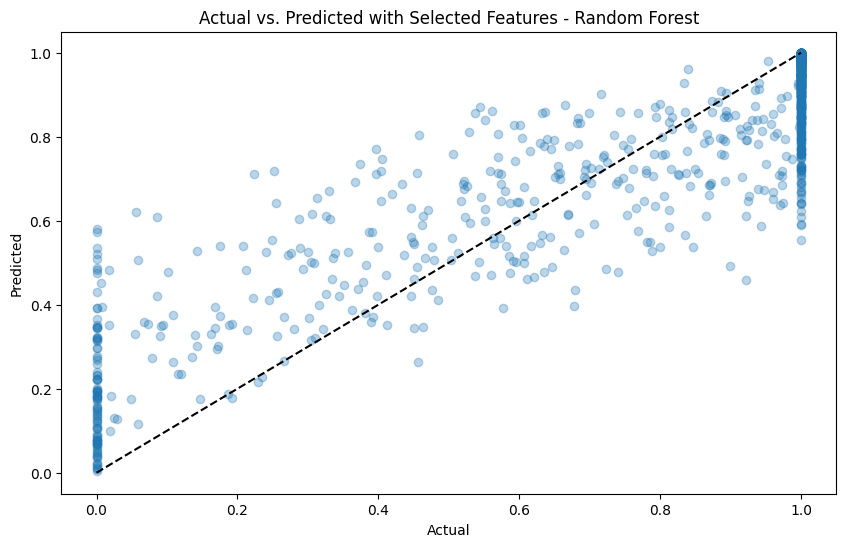

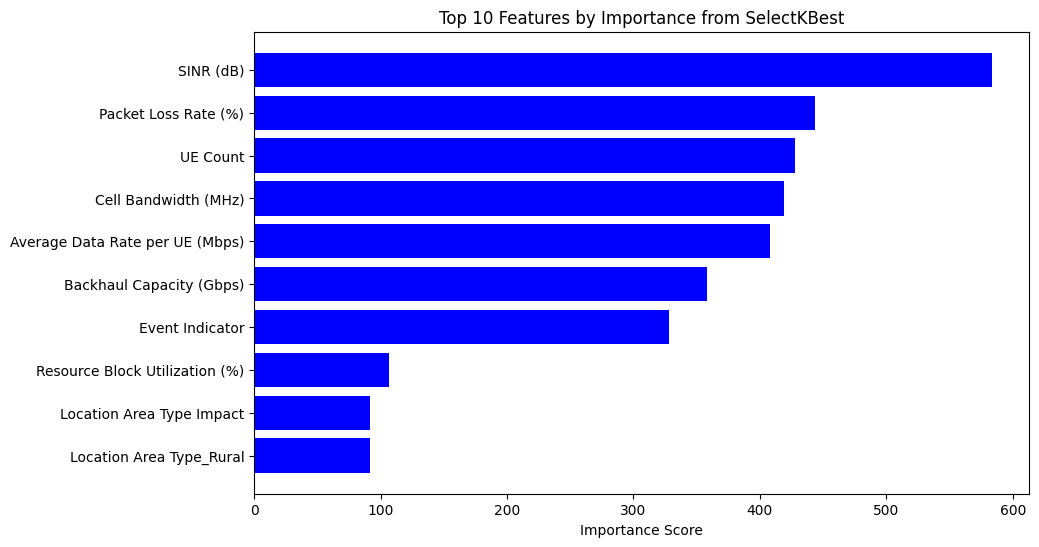

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
dataset = pd.read_excel('mobile_network_congestion_dataset.xlsx')

# Plot histograms for the dataset
dataset.hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()


categorical_cols = dataset.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('Congestion Level')

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


X = dataset.drop('Congestion Level', axis=1)
y = dataset['Congestion Level']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train_test_split_sizes = [len(X_train), len(X_test)]
plt.figure(figsize=(5, 5))
plt.pie(train_test_split_sizes, labels=['Train set', 'Test set'], autopct='%1.1f%%', startangle=90)
plt.title('Train/Test Split')
plt.show()

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# models with all features
results_all_features = {}
for model_name, model in models.items():
   
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    # Evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results_all_features[model_name] = {'MAE': mae, 'MSE': mse, 'R2': r2}
    
   
    print(f"{model_name}:")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  R-squared (R²): {r2:.4f}\n")
    
    #  Actual vs Predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs. Predicted - {model_name}')
    plt.show()
# Feature selection 
selector = SelectKBest(f_regression, k=10)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

for model_name, model in models.items():
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', selector),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} with Selected Features:")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  R-squared (R²): {r2:.4f}\n")
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs. Predicted with Selected Features - {model_name}')
    plt.show()

feature_importances = pipeline.named_steps['feature_selection'].scores_

# ColumnTransformer
num_features = preprocessor.transformers_[0][1].get_feature_names_out()
cat_features = preprocessor.transformers_[1][1].get_feature_names_out()
all_feature_names = np.concatenate((num_features, cat_features))

top_features_indices = np.argsort(feature_importances)[-10:]  
top_features_scores = feature_importances[top_features_indices]
top_features_names = all_feature_names[top_features_indices]

plt.figure(figsize=(10, 6))
plt.barh(top_features_names, top_features_scores, color='blue')
plt.xlabel('Importance Score')
plt.title('Top 10 Features by Importance from SelectKBest')
plt.show()

.

.

.

.

####CLASSIFICATION TASK####

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

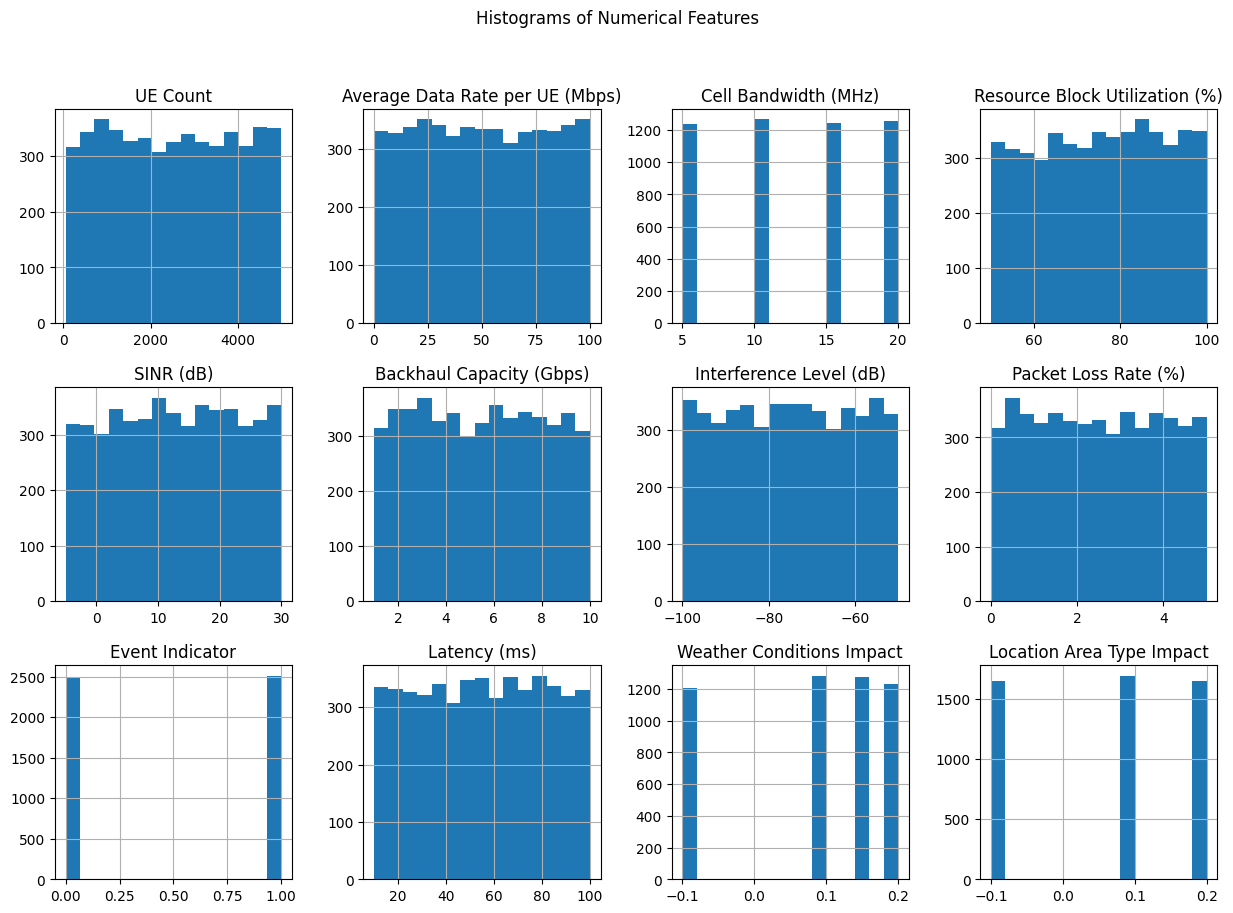

In [10]:
data = pd.read_excel('./mobile_network_congestion_dataset.xlsx',sheet_name='Sheet2')

X = data.drop(columns=['Congestion Level', 'Congestion Category'])
y = data['Congestion Category']

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
data[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 4))  
plt.suptitle('Histograms of Numerical Features')
plt.show()


In [ ]:


plt.figure(figsize=(8, 4))
data['Congestion Category'].value_counts().plot(kind='bar', title='Class Distribution Before Balancing')
plt.show()

min_size = data['Congestion Category'].value_counts().min()
balanced_data = data.groupby('Congestion Category').apply(lambda x: x.sample(min_size)).reset_index(drop=True)
plt.figure(figsize=(8, 4))
balanced_data['Congestion Category'].value_counts().plot(kind='bar', title='Class Distribution After Balancing')
plt.show()
X = balanced_data.drop('Congestion Category', axis=1)
y = balanced_data['Congestion Category']

categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(), categorical_cols)
])

X_processed = preprocessor.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

plt.figure(figsize=(6, 6))
sizes = [len(X_train), len(X_test)]
labels = ['Train', 'Test']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Train-Test Split')
plt.show()


In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = label_encoder.transform(y_test)
y_test_encoded = to_categorical(y_test_encoded)

model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(y_train_encoded.shape[1], activation='softmax')  # Matches the number of classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2)



13/13 - 0s - 4ms/step - accuracy: 0.9532 - loss: 0.1942

Test accuracy: 0.9532467722892761
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


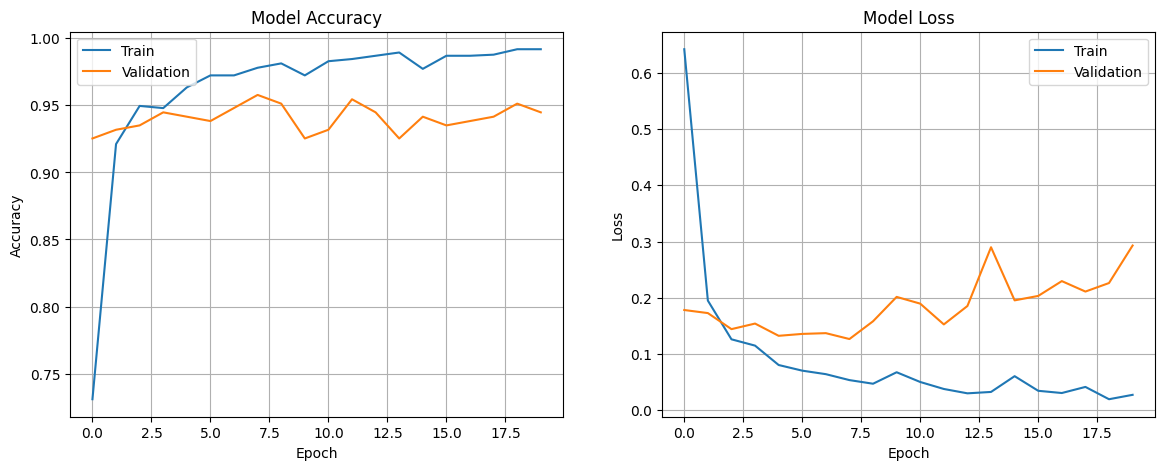

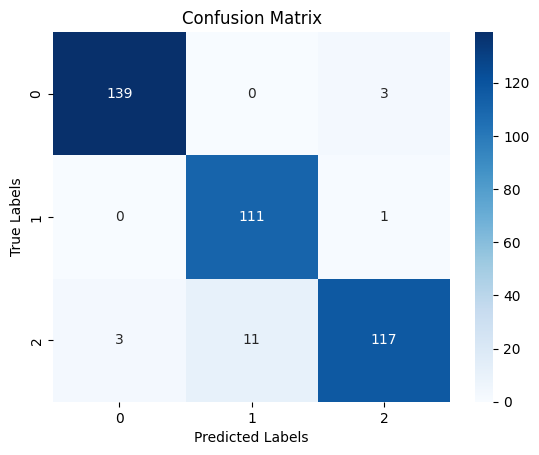

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       142
           1       0.91      0.99      0.95       112
           2       0.97      0.89      0.93       131

    accuracy                           0.95       385
   macro avg       0.95      0.95      0.95       385
weighted avg       0.95      0.95      0.95       385



In [13]:

test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=2)
print('\nTest accuracy:', test_acc)


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)


plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


from sklearn.metrics import classification_report
print(classification_report(y_test_classes, y_pred_classes))
